Q- se the following to create a PCA object that uses only the first six principal components:
pca = PCA(n_components=6,random_state=100)
Use this object to fit and transform the data. Use this transformed data in sklearn linear model to predict. What would the mean squared error of this model be (up to two decimal places)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [6]:
df=pd.read_csv("newhousing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


#### checking corealtion

<AxesSubplot:>

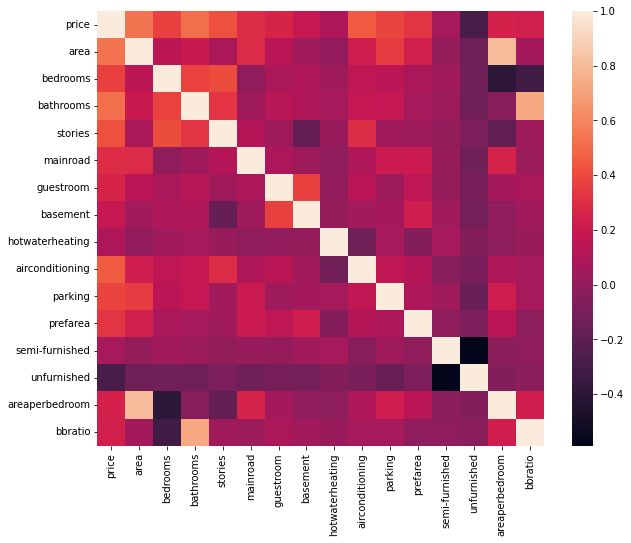

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

#### using corelation function

In [41]:
def fndcorr(df,thres):
    cols=set()
    col_corr=df.corr()
    for i in range(len(col_corr)):
        for j in range(i):
            if col_corr.iloc[i,j]>abs(thres):
                colm=col_corr.columns[i]
                cols.add(colm)
    return cols

In [42]:
fndcorr(df,.8)

{'areaperbedroom'}

In [43]:
dg=df.corr()
dg["areaperbedroom"]

price              0.244809
area               0.805610
bedrooms          -0.397259
bathrooms         -0.052352
stories           -0.178942
mainroad           0.249829
guestroom          0.054312
basement          -0.017034
hotwaterheating   -0.021634
airconditioning    0.096830
parking            0.224387
prefarea           0.141576
semi-furnished    -0.028909
unfurnished       -0.062323
areaperbedroom     1.000000
bbratio            0.225242
Name: areaperbedroom, dtype: float64

# Model Building Using Linear regression

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Note--
**- Always transform target variable as well, as before i have not done this i am getting mean square error on 11399473.843**

**- So i do df_train and df_test and split in X_train and X_test later**

In [45]:
df_train,df_test=train_test_split(df,train_size=0.8,random_state=100)

In [46]:
print(df_train.shape)
print(df_test.shape)


(436, 16)
(109, 16)


In [47]:
cols=df_train.columns
cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [48]:
#instanatize the standardscaler
scaler=StandardScaler()

In [49]:
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=[cols])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,-0.690341,-1.155610,0.018551,-0.547076,0.228123,0.410975,-0.441045,1.402136,-0.219265,-0.676900,-0.801822,1.857143,-0.834565,1.416650,-1.150484,-0.674788
1,-0.054413,-1.036986,-1.329518,-0.547076,0.228123,0.410975,2.267343,1.402136,-0.219265,-0.676900,-0.801822,1.857143,1.198230,-0.705891,-0.450234,0.398179
2,-0.129228,-0.288736,1.366621,-0.547076,0.228123,0.410975,-0.441045,-0.713197,-0.219265,1.477322,1.468272,-0.538462,1.198230,-0.705891,-0.831343,-1.211272
3,2.650154,0.391076,1.366621,3.461749,0.228123,0.410975,2.267343,1.402136,4.560702,-0.676900,1.468272,-0.538462,1.198230,-0.705891,-0.369675,2.007630
4,1.030407,0.582701,0.018551,1.457336,1.398261,0.410975,-0.441045,-0.713197,-0.219265,1.477322,-0.801822,1.857143,-0.834565,-0.705891,0.423528,1.471146


In [50]:
df_test=pd.DataFrame(scaler.transform(df_test),columns=[cols])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.562812,0.391076,0.018551,1.457336,2.568399,0.410975,-0.441045,-0.713197,-0.219265,1.477322,-0.801822,-0.538462,-0.834565,1.416650,0.250015,1.471146
1,-0.578118,-0.462111,0.018551,1.457336,0.228123,0.410975,-0.441045,-0.713197,-0.219265,-0.676900,1.468272,-0.538462,1.198230,-0.705891,-0.522531,1.471146
2,1.329667,0.391076,0.018551,1.457336,2.568399,0.410975,2.267343,-0.713197,-0.219265,1.477322,0.333225,-0.538462,-0.834565,-0.705891,0.250015,1.471146
3,1.011703,-0.521423,0.018551,1.457336,0.228123,0.410975,-0.441045,1.402136,-0.219265,1.477322,0.333225,-0.538462,1.198230,-0.705891,-0.576238,1.471146
4,-0.877379,-0.936611,-1.329518,-0.547076,-0.942015,0.410975,2.267343,1.402136,-0.219265,-0.676900,-0.801822,-0.538462,-0.834565,1.416650,-0.313903,0.398179


In [51]:
## Find X_train and Y_train
y_train=df_train.pop("price")
X_train=df_train

In [52]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,-1.155610,0.018551,-0.547076,0.228123,0.410975,-0.441045,1.402136,-0.219265,-0.676900,-0.801822,1.857143,-0.834565,1.416650,-1.150484,-0.674788
1,-1.036986,-1.329518,-0.547076,0.228123,0.410975,2.267343,1.402136,-0.219265,-0.676900,-0.801822,1.857143,1.198230,-0.705891,-0.450234,0.398179
2,-0.288736,1.366621,-0.547076,0.228123,0.410975,-0.441045,-0.713197,-0.219265,1.477322,1.468272,-0.538462,1.198230,-0.705891,-0.831343,-1.211272
3,0.391076,1.366621,3.461749,0.228123,0.410975,2.267343,1.402136,4.560702,-0.676900,1.468272,-0.538462,1.198230,-0.705891,-0.369675,2.007630
4,0.582701,0.018551,1.457336,1.398261,0.410975,-0.441045,-0.713197,-0.219265,1.477322,-0.801822,1.857143,-0.834565,-0.705891,0.423528,1.471146


In [53]:
y_train.head()

,price
0,-0.690341
1,-0.054413
2,-0.129228
3,2.650154
4,1.030407


In [20]:
## Find X_test and y_test
y_test=df_test.pop("price")
X_test=df_test

In [22]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.391076,0.018551,1.457336,2.568399,0.410975,-0.441045,-0.713197,-0.219265,1.477322,-0.801822,-0.538462,-0.834565,1.416650,0.250015,1.471146
1,-0.462111,0.018551,1.457336,0.228123,0.410975,-0.441045,-0.713197,-0.219265,-0.676900,1.468272,-0.538462,1.198230,-0.705891,-0.522531,1.471146
2,0.391076,0.018551,1.457336,2.568399,0.410975,2.267343,-0.713197,-0.219265,1.477322,0.333225,-0.538462,-0.834565,-0.705891,0.250015,1.471146
3,-0.521423,0.018551,1.457336,0.228123,0.410975,-0.441045,1.402136,-0.219265,1.477322,0.333225,-0.538462,1.198230,-0.705891,-0.576238,1.471146
4,-0.936611,-1.329518,-0.547076,-0.942015,0.410975,2.267343,1.402136,-0.219265,-0.676900,-0.801822,-0.538462,-0.834565,1.416650,-0.313903,0.398179


In [54]:
y_test.head()

,price
0,0.562812
1,-0.578118
2,1.329667
3,1.011703
4,-0.877379


# PCA

In [55]:
from sklearn.decomposition import PCA

#### As in upgrad ques. it is given to take N_compnent as 6, for more detail check PCA.ipynb

In [56]:
pca = PCA(n_components=6,random_state=100)

In [57]:
model_pca=pca.fit_transform(X_train)

In [58]:
model_pca.shape

(436, 6)

**Note we dont do fit_transorm in test_pca**
- As we never transform the data

In [59]:
test_pca=pca.transform(X_test)
test_pca.shape

(109, 6)

<AxesSubplot:>

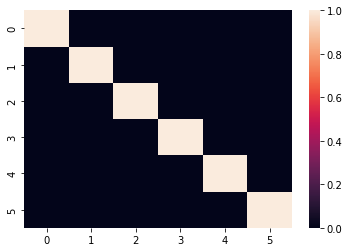

In [60]:
# checking corealtion again
cormat=np.corrcoef(model_pca.T)
sns.heatmap(cormat)

#### Applying Linear model as given in upgrad question

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [62]:
lr_model=lr.fit(model_pca,y_train)

#### Check mean sqaured error

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
y_pred=lr_model.predict(test_pca)

In [65]:
mean_squared_error(y_pred,y_test)

0.38372286399924577